In [1]:
import numpy as np
import pandas as pd 
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(os.listdir("./utkface_aligned_cropped/"))

C:\Users\aakarsh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aakarsh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aakarsh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aakarsh\anaconda3\envs\tf\lib\site-packages\tensorflow\python\frame

['UTKFace']


In [2]:
def imshow(img):
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

In [3]:
onlyfiles = os.listdir("./utkface_aligned_cropped/UTKFace")
y = np.array([[[i.split('_')[0]],[i.split('_')[1]]] for i in onlyfiles])
# y = np.array([[i.split('_')[1] for i in onlyfiles]]).T
print(y.shape)
print(y[1000])

(23708, 2, 1)
[['16']
 ['1']]


In [4]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread("./utkface_aligned_cropped/UTKFace/"+file,cv2.IMREAD_COLOR)
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face =cv2.resize(face, (32,32) )
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

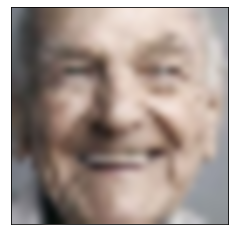

[['100']
 ['0']]


In [5]:
X = np.squeeze(X_data)
imshow(X[1])
print(y[1])

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)
y_train=[y_train[:,1],y_train[:,0]]
y_valid=[y_valid[:,1],y_valid[:,0]]

In [7]:
import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('AgeGenderModel.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
classifierLoad.evaluate(X_valid,y_valid)

7824/7824 [==============================] - 6s 780us/sample - loss: 4.8385 - sex_out_loss: 0.2504 - age_out_loss: 4.5870


[4.838542032339334, 0.25041687, 4.58703]

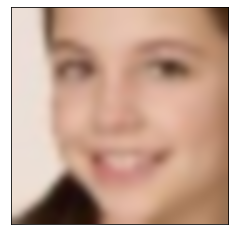

['1'] ['16']
[array([[0.9740205]], dtype=float32), array([[23.007772]], dtype=float32)]


In [28]:
p_id=2000
imshow(X_valid[p_id])
print(y_valid[0][p_id],y_valid[1][p_id])
print(classifierLoad.predict([[X_valid[p_id]]]))